# CH15. OpenCV 이용 및 이미지 데이터 처리

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time

%matplotlib inline

def aidemy_imshow(name, img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    plt.imshow(img)
    plt.show()

cv2.imshow = aidemy_imshow

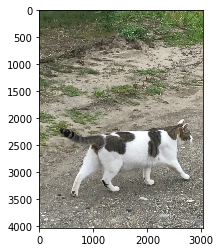

In [2]:
#
import numpy as np
import cv2

#-
img = cv2.imread("cleansing_data/sample.jpg")

#
cv2.imshow("title", img)


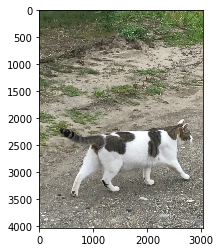

In [3]:
import numpy as np
import cv2

#
img = cv2.imread("cleansing_data/sample.jpg")

#
cv2.imshow("sample", img)

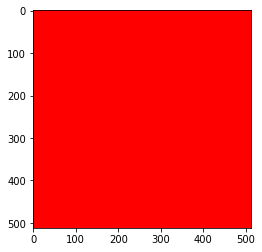

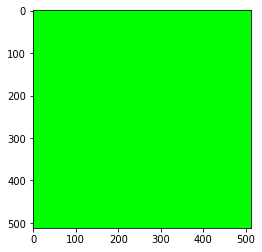

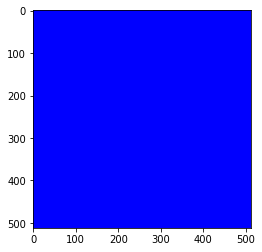

True

In [6]:
import numpy as np
import cv2

#
img_size = (512, 512)

#
my_img = np.array([[[0, 0, 255] for _ in range(img_size[1])] for _ in range(img_size[0])], dtype="uint8")
my_img2 = np.array([[[0, 255, 0] for _ in range(img_size[1])] for _ in range(img_size[0])], dtype="uint8")
my_img3 = np.array([[[255, 0, 0] for _ in range(img_size[1])] for _ in range(img_size[0])], dtype="uint8")

#
cv2.imshow("title", my_img)
cv2.imshow("title2", my_img2)
cv2.imshow("title3", my_img3)

#
cv2.imwrite("my_red_img.jpg", my_img)
  

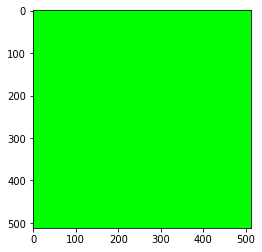

In [7]:
import numpy as np
import cv2

#
img_size = (512, 512)

#
img = np.array([[[0, 255, 0] for _ in range(img_size[1])] for _ in range(img_size[0])], dtype="uint8")

cv2.imshow("green", img)

(4032, 3024, 3)


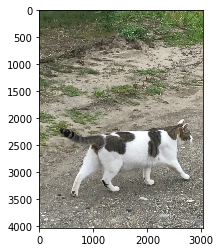

(2016, 1008, 3)


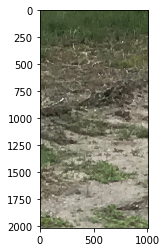

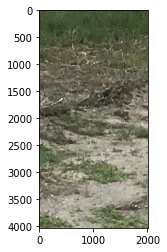

In [16]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")
size = img.shape
print(size)
cv2.imshow("",img)

#
my_img = img[: size[0] // 2, : size[1] // 3]
print(my_img.shape)

#
my_img2 = cv2.resize(my_img, (my_img.shape[1] * 1, my_img.shape[0] * 1))
cv2.imshow("",my_img2)

my_img = cv2.resize(my_img, (my_img.shape[1] * 2, my_img.shape[0] * 2))
cv2.imshow("sample", my_img)


(4032, 3024, 3)


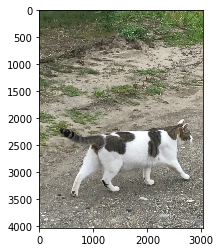

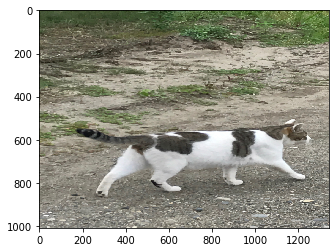

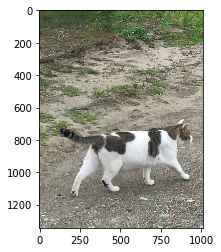

In [20]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")
print(img.shape)
cv2.imshow("", img)
#
my_img2 = cv2.resize(img, (img.shape[0]//3, img.shape[1]//3))
cv2.imshow("", my_img2)
#
my_img = cv2.resize(img, (img.shape[1] // 3, img.shape[0] // 3))
cv2.imshow("sample", my_img)


(4032, 3024)


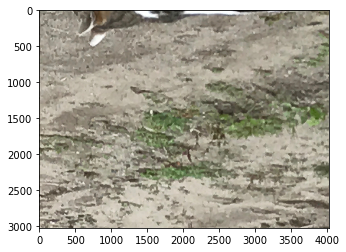

In [22]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

print(img.shape[:2])

#-- getRotationMatrix2D()
# (회전의 중심, 회전의 각도, 배율)
mat = cv2.getRotationMatrix2D(tuple(np.array(img.shape[:2]) /2), 180, 2.0)


#-- warpAffine()
# (이미지, 행렬(mat), 사이즈)
my_img = cv2.warpAffine(img, mat, img.shape[:2])

#
cv2.imshow("sample", my_img)


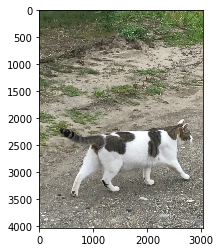

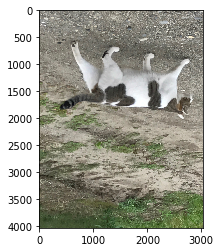

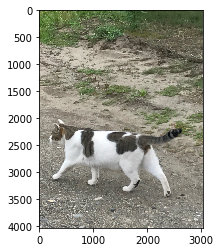

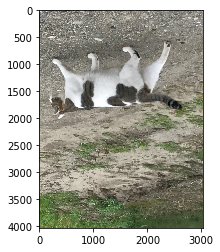

In [25]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

#
my_img = cv2.flip(img, 0)
my_img2 = cv2.flip(img, 1)
my_img3 = cv2.flip(img, -1)

cv2.imshow("org", img)
cv2.imshow("flip-x", my_img)
cv2.imshow("flip-y", my_img2)
cv2.imshow("flip-xy", my_img3)


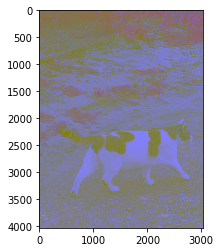

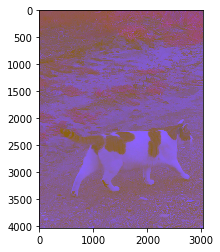

In [32]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

#color space
my_img  = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
my_img2 = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
#
cv2.imshow("sample", my_img)
cv2.imshow("gray", my_img2)


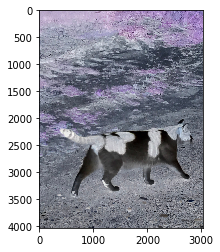

In [33]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

#--
for i in range(len(img)):
    for j in range(len(img[i])):
        for k in range(len(img[i][j])):
            img[i][j][k] = 255 - img[i][j][k]

cv2.imshow("aa", img)



### 임계값 처리

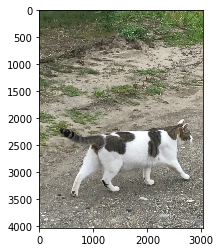

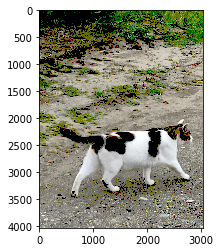

In [38]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")
cv2.imshow("org", img)

#-- threshold()
# (이미지, 임계값, 최대값(maxvalue), mode)
#
# mode
#
#  THRESH_BINARY     : 픽셀값이 임계값을 초과하는 경우 해당 픽셀을 maxValue, 그 이외의 경우 0(검은색)
#  THRESH_BINARY_INV : 픽셀값이 임계값을 초과하는 경우 0,                 그 이외의 경우 maxValue
#  THRESH_TRUNC      : 픽셀값이 임계값을 초과하는 경우 임계값,              그 이외의 픽셀은 변경하지 않음
#  THRESH_TOZERO     : 픽셀값이 임계값을 초과하는 경우 변경하지 않고,        그 이외의 경우 0
#  THRESH_TOZERO_INV : 픽셀값이 임계값을 초과하는 경우 0,                 그 이외의 경우 변경하지 않음

#-
retval, my_img = cv2.threshold(img, 90, 255, cv2.THRESH_TOZERO)

cv2.imshow("sample", my_img)


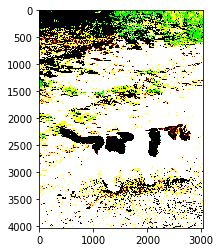

In [42]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

#-
retval, my_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

cv2.imshow("sample", my_img)

### 마스킹

(4032, 3024, 3)


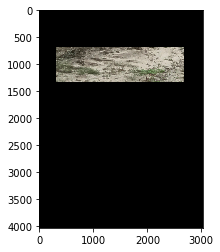

In [43]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# channels : 0
mask = cv2.imread("cleansing_data/mask.png", 0)

print(img.shape)
#-
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

#
my_img = cv2.bitwise_and(img, img, mask = mask)

cv2.imshow("sample", my_img)


4032


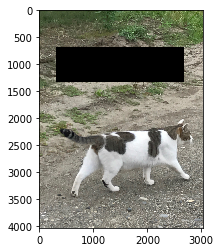

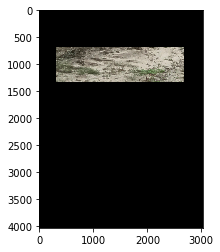

In [49]:
import numpy as np
import cv2

img  = cv2.imread("cleansing_data/sample.jpg")
mask = cv2.imread("cleansing_data/mask.png", 0)
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

#
print(img.shape[0])

#
retval, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY_INV)
my_img = cv2.bitwise_and(img, img, mask = mask)
cv2.imshow("sample", my_img)

retval, mask = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY_INV)
my_img2 = cv2.bitwise_and(img, img, mask = mask)
cv2.imshow("sample", my_img2)


### 흐림

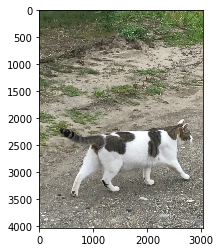

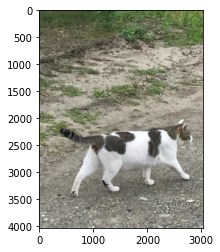

In [55]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")
cv2.imshow("",img)

# (이미지, n x n(마스크 크기) n은 홀수, x축 방향의 편차(일반적으로 0 지정))
my_img = cv2.GaussianBlur(img, (51,51), 0)

cv2.imshow("sample", my_img)


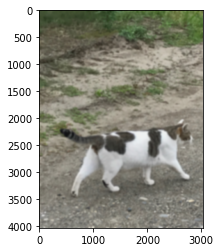

In [57]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

#
my_img = cv2.GaussianBlur(img, (91,91), 0)

cv2.imshow("sample", my_img)


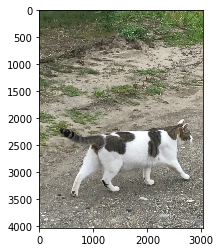

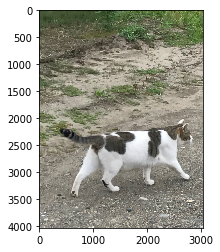

In [58]:
import numpy as np
import cv2
  
img = cv2.imread("cleansing_data/sample.jpg")
my_img = cv2.fastNlMeansDenoisingColored(img)

#
cv2.imshow("", img)
cv2.imshow("sample", my_img)


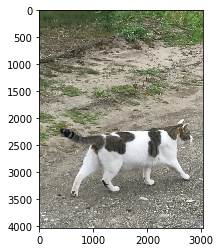

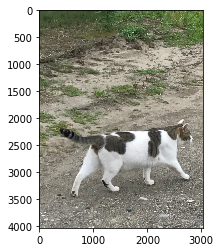

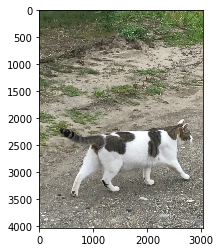

In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("cleansing_data/sample.jpg")

#- filter define
filt = np.array([[0, 11, 0],
                 [11, 0, 11],
                 [0, 11, 0]], np.uint8)

#- dilate
my_img = cv2.dilate(img, filt)

cv2.imshow("sample", my_img)



#- erode
my_img2 = cv2.erode(img, filt)
cv2.imshow("sample", my_img2)

#-
cv2.imshow("original", img)
plt.show()


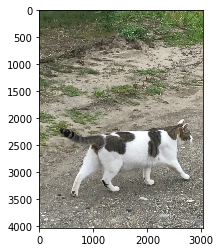

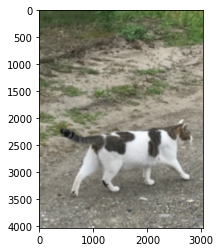

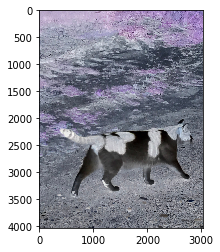

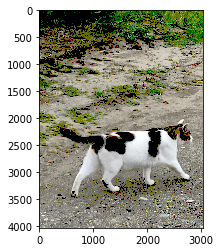

In [61]:
import cv2
import numpy as np

img = cv2.imread("cleansing_data/sample.jpg")

#-
cv2.imshow('Original', img)

#-
blur_img = cv2.GaussianBlur(img, (77,77), 0)
cv2.imshow('Blur', blur_img)

#- bitwise_not (반전)
bit_img = cv2.bitwise_not(img)
cv2.imshow('Bit', bit_img)

#- threshold 90 ,   이상 : 0
retval, thre_img = cv2.threshold(img, 90, 255, cv2.THRESH_TOZERO)
cv2.imshow('THRESH', thre_img)


### 종합 문제

In [62]:
#
# def scratch_image(img, flip=True, thr=True, filt=True, resize=True, erode=True):
    #flip   : 이미지의 좌우 반전
    #thr    : 임계값 처리
    #filt   : 흐림 효과
    #resize : 모자이크 처리
    #erode :  침식 여부를 지정

In [63]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

def scratch_image(img, flip=True, thr=True, filt=True, resize=True, erode=True):
    #--
    methods = [flip, thr, filt, resize, erode]

    #- 흐림 필터
    img_size = img.shape
    filter1 = np.ones((3, 3))
    print(filter1)

    #- 원본 이미지 데이터를 배열에 저장
    images = [img]

    #-- argumentation
    scratch = np.array([
        lambda x: cv2.flip(x, 1),
        lambda x: cv2.threshold(x, 100, 255, cv2.THRESH_TOZERO)[1],
        lambda x: cv2.GaussianBlur(x, (5, 5), 0),
        lambda x: cv2.resize(cv2.resize(x, (img_size[1]//5, img_size[0]//5)),(img_size[1], img_size[0])),
        lambda x: cv2.erode(x, filter1)
    ])

    #--
    doubling_images = lambda f, imag: np.r_[imag, [f(i) for i in imag]]

    #--execute argumentation
    for func in scratch[methods]:
        images = doubling_images(func, images)
        
    return images


#--load image
cat_img = cv2.imread("cleansing_data/cat_sample.jpg")

#--
scratch_cat_images = scratch_image(cat_img)

#- make folder
if not os.path.exists("scratch_images"):
    os.mkdir("scratch_images")
#-- save images
for num, im in enumerate(scratch_cat_images):
    #폴더 위치에 번호를 붙여 저장
    cv2.imwrite("scratch_images/" + str(num) + ".jpg" ,im)


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [65]:
#-- 리스트 내포를 사용한 다른 부풀리기
filter2 = np.ones((3,3))

sc_flip = [
    lambda x: x,
    lambda x: cv2.flip(x, 1)
]
sc_thr = [
    lambda x: x,
    lambda x: cv2.threshold(x, 100, 255, cv2.THRESH_TOZERO)[1]
]
sc_filter = [
    lambda x: x,
    lambda x: cv2.GaussianBlur(x, (5, 5), 0)
]
sc_mosaic = [
    lambda x: x,
    lambda x: cv2.resize(cv2.resize(
        x, (img_size[1] // 5, img_size[0] // 5)
        ),(img_size[1], img_size[0]))
]
sc_erode = [
    lambda x: x,
    lambda x: cv2.erode(x, filter2)
]
#--
[e(d(c(b(a(img))))) for a in sc_flip for b in sc_thr for c in sc_filter for d in sc_mosaic for e in sc_erode]


[array([[[ 61,  98,  78],
         [ 61,  98,  78],
         [ 62,  99,  79],
         ...,
         [ 78, 128, 116],
         [ 78, 128, 116],
         [ 78, 128, 116]],
 
        [[ 61,  98,  78],
         [ 61,  98,  78],
         [ 61,  98,  78],
         ...,
         [ 77, 127, 115],
         [ 76, 126, 114],
         [ 76, 126, 114]],
 
        [[ 60,  97,  77],
         [ 60,  97,  77],
         [ 60,  97,  77],
         ...,
         [ 75, 126, 112],
         [ 75, 126, 112],
         [ 74, 125, 111]],
 
        ...,
 
        [[178, 183, 186],
         [178, 183, 186],
         [178, 183, 184],
         ...,
         [203, 205, 206],
         [206, 208, 209],
         [207, 209, 210]],
 
        [[178, 183, 186],
         [178, 183, 186],
         [177, 182, 183],
         ...,
         [204, 206, 207],
         [207, 209, 210],
         [208, 210, 211]],
 
        [[177, 182, 185],
         [177, 182, 185],
         [177, 182, 183],
         ...,
         [204, 206, 207],
  

In [66]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

def scratch_image(img, flip=True, thr=True, filt=True, resize=True, erode=True):
    #
    methods = [flip, thr, filt, resize, erode]

    #
    img_size = img.shape
    filter1 = np.ones((3, 3))

    #-- function
    scratch = np.array([
        lambda x: cv2.flip(x, 1),
        lambda x: cv2.threshold(x, 100, 255, cv2.THRESH_TOZERO)[1],
        lambda x: cv2.GaussianBlur(x, (5, 5), 0),
        lambda x: cv2.resize(cv2.resize(x, (img_size[1]//5, img_size[0]//5)),(img_size[1], img_size[0])),
        lambda x: cv2.erode(x, filter1)
    ])
    act_scratch = scratch[methods]

    #- method
    act_num = np.sum([methods])
    form = "0" + str(act_num) + "b"
    cf = np.array([list(format(i, form)) for i in range(2**act_num)])

    #--
    images = []
    for i in range(2**act_num):
        im = img
        for func in act_scratch[cf[i]=="1"]: # bool 인덱스를 참조합니다
            im = func(im)
        images.append(im)
    return images


#-
cat_img = cv2.imread("cleansing_data/cat_sample.jpg")

#
scratch_cat_images = scratch_image(cat_img)

#
if not os.path.exists("scratch_images"):
    os.mkdir("scratch_images")
#
for num, im in enumerate(scratch_cat_images):
    #
    cv2.imwrite("scratch_images/" + "1" + str(num) + ".jpg" ,im)
